In [1]:
# importo la funzione start_kaggle che ho definito nel file autenticazione.py
from autenticazione.autenticazione import start_kaggle

# chiamo la funzione start_kaggle
start_kaggle()

# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# importo le librerie necessarie di default
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Visualizzare la lista dei dataset
key_search = str(input("Inserisci la chiave di ricerca: "))
datasets = kaggle.api.datasets_list(search=key_search)

# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'

print("Lista dei dataset trovati: ")
for i in range(len(datasets)):
    print(f"{i}: {datasets[i]['ref']}")


Lista dei dataset trovati: 
0: mczielinski/bitcoin-historical-data
1: kaushiksuresh147/bitcoin-tweets
2: prasoonkottarathil/btcinusd
3: bigquery/bitcoin-blockchain
4: varpit94/bitcoin-data-updated-till-26jun2021
5: alaix14/bitcoin-tweets-20160101-to-20190329
6: aakashverma8900/bitcoin-price-usd
7: bigquery/crypto-bitcoin-cash
8: team-ai/bitcoin-price-prediction
9: meetnagadia/bitcoin-stock-data-sept-17-2014-august-24-2021
10: taruntiwarihp/bitcoin
11: adilbhatti/bitcoin-and-stock-exchanges
12: ellipticco/elliptic-data-set
13: aditeloo/bitcoin
14: adilbhatti/bitcoin-and-fear-and-greed
15: paul92s/bitcoin-tweets-14m
16: yasserh/bitcoin-prices-dataset
17: sudalairajkumar/cryptocurrencypricehistory
18: hamdinizar/bitcoin
19: tencars/392-crypto-currency-pairs-at-minute-resolution


In [3]:
# scelgo il dataset che mi interessa e lo scarico
dt_scelto = int(input("Inserisci il numero del dataset che ti interessa: "))

# salvo in una variabile i nomi di tutti i file del dataset
file_name = kaggle.api.dataset_list_files(datasets[dt_scelto]['ref']).files

# scarico il dataset
kaggle.api.dataset_download_files(datasets[dt_scelto]['ref'], path=path, unzip=True)

In [4]:
for i in range(len(file_name)):
    print(f"File n {i}: {file_name[i]}")


File n 0: bitcoin_price_Training - Training.csv
File n 1: bitcoin_price_1week_Test - Test.csv


In [29]:
choise = int(input('Scegli il file da aprire: '))
if '.csv' in str(file_name[choise]):
    df = pd.read_csv(path + '/' + str(file_name[choise]))
elif '.json' in str(file_name[choise]):
    df = pd.read_json(path + '/' + str(file_name[choise]))
else:
    print('Formato non riconosciuto')

ANALIZZIAMO IL DATASET DI BITCOIN E CERCHIAMO DI PREVEDERE IL PREZZO DI CHIUSURA DEL GIORNO SUCCESSIVO

In [30]:
# stampo le prime 5 righe del dataset
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [31]:
# cominciamo con trasformare la colonna Date in un formato datetime
# il formato attuale è 'b %d, %Y' (es. 'Jan 01, 2017')
# https://www.ibm.com/docs/en/cmofz/10.1.0?topic=SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

In [32]:
# ora imposto la colonna Date come indice del dataframe
df.set_index('Date', inplace=True)

In [33]:
# analizziamo il dataset alla ricerca di valori nulli
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [34]:
# non ci sono valori nulli, quindi possiamo proseguire con l'analisi
# vediamo un po di statistiche sul dataset
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [35]:
volume = df['Volume'].values

In [37]:
for i in range(len(volume)):
    try:
        volume[i] = float(volume[i].replace(',', ''))
    except:
        print(f"Errore alla riga {i}, il suo valore è {volume[i]}")

Errore alla riga 1313, il suo valore è -
Errore alla riga 1314, il suo valore è -
Errore alla riga 1315, il suo valore è -
Errore alla riga 1316, il suo valore è -
Errore alla riga 1317, il suo valore è -
Errore alla riga 1318, il suo valore è -
Errore alla riga 1319, il suo valore è -
Errore alla riga 1320, il suo valore è -
Errore alla riga 1321, il suo valore è -
Errore alla riga 1322, il suo valore è -
Errore alla riga 1323, il suo valore è -
Errore alla riga 1324, il suo valore è -
Errore alla riga 1325, il suo valore è -
Errore alla riga 1326, il suo valore è -
Errore alla riga 1327, il suo valore è -
Errore alla riga 1328, il suo valore è -
Errore alla riga 1329, il suo valore è -
Errore alla riga 1330, il suo valore è -
Errore alla riga 1331, il suo valore è -
Errore alla riga 1332, il suo valore è -
Errore alla riga 1333, il suo valore è -
Errore alla riga 1334, il suo valore è -
Errore alla riga 1335, il suo valore è -
Errore alla riga 1336, il suo valore è -
Errore alla riga

In [39]:
# sostiutiamo il valore '-' con il valore np.nan
volume[volume == '-'] = np.nan

In [40]:
df['Volume'] = volume

In [43]:
# converto la colonna Volume in float
df['Volume'] = df['Volume'].astype(float)

In [45]:
# facciamo la stessa cosa per la colonna Market Cap
market_cap = df['Market Cap'].values


In [46]:
for i in range(len(market_cap)):
    try:
        market_cap[i] = float(market_cap[i].replace(',', ''))
    except:
        print(f"Errore alla riga {i}, il suo valore è {market_cap[i]}")

In [47]:
df['Market Cap'] = market_cap
df['Market Cap'] = df['Market Cap'].astype(float)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1556 entries, 2017-07-31 to 2013-04-28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1556 non-null   float64
 1   High        1556 non-null   float64
 2   Low         1556 non-null   float64
 3   Close       1556 non-null   float64
 4   Volume      1313 non-null   float64
 5   Market Cap  1556 non-null   float64
dtypes: float64(6)
memory usage: 85.1 KB


In [49]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1556.000000,1556.000000,1556.000000,1556.000000,1.313000e+03,1.556000e+03
mean,582.625328,597.992847,567.851446,584.239396,1.481643e+08,8.694353e+09
std,523.137312,542.992855,505.877401,525.904442,3.242987e+08,8.707288e+09
min,68.500000,74.560000,65.530000,68.430000,2.857830e+06,7.792550e+08
25%,254.287500,260.327500,248.835000,254.320000,2.071070e+07,3.598355e+09
50%,438.600000,447.560000,430.570000,438.855000,4.530140e+07,6.386210e+09
75%,662.437500,674.525000,646.735000,663.402500,9.037880e+07,9.898830e+09
max,2953.220000,2999.910000,2840.530000,2958.110000,2.569530e+09,4.839120e+10


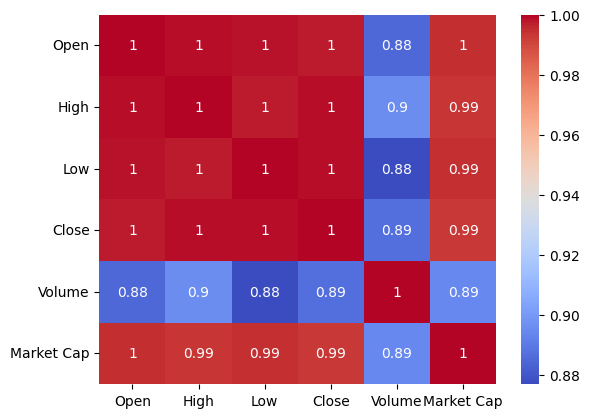

In [50]:
# ora cerchiamo di capire come se ci sono delle correlazioni e mettiamole a video
# per farlo usiamo la funzione corr() di pandas
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [51]:
# facciamo una regressione lineare multipla per capire se possiamo prevedere il valore di Close
# in base al valore di Open, High, Low, Volume e Market Cap
# ma prima scaliamo i dati
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# ora creiamo il dataframe con i dati scalati
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

df_scaled.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,4.169681,4.221720,4.256863,4.357897,2.197611,4.232465
2017-07-30,4.095394,3.980221,4.107055,4.133145,1.720609,4.158354
2017-07-29,4.253395,4.072757,4.201871,4.074693,2.022307,4.314136
2017-07-28,4.009997,4.236145,4.176027,4.231730,3.800217,4.072617
2017-07-27,3.740344,3.860089,3.878646,3.970706,1.977140,3.805180


In [54]:
# ora creiamo il modello di regressione lineare multipla
from sklearn.linear_model import LinearRegression

# creo il modello
model = LinearRegression()

# eliminiamo i valori nulli
df.dropna(inplace=True)

# creo le variabili indipendenti e dipendenti
X = df.drop('Close', axis=1)
y = df['Close']

# addestro il modello
model.fit(X, y)

# stampo i coefficienti
print(f"I coefficienti sono: {model.coef_}")

# stampo l'intercetta
print(f"L'intercetta è: {model.intercept_}")

# stampo il punteggio R^2
print(f"R^2: {model.score(X, y)}")



I coefficienti sono: [-4.24207657e-01  6.16605917e-01  8.26267099e-01  1.16122367e-08
 -9.47908751e-10]
L'intercetta è: -0.5293766209763362
R^2: 0.9991002410206216


In [55]:
# apriamo il dataset con i dati di test
df_test = pd.read_csv(path + '/' + str(file_name[1]))

In [56]:
# convertiamo la colonna data in datetime e la impostiamo come indice
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%b %d, %Y')
df_test.set_index('Date', inplace=True)



In [59]:
volume = df_test['Volume'].values
for i in range(len(volume)):
    try:
        volume[i] = float(volume[i].replace(',', ''))
    except:
        print(f"Errore alla riga {i}, il suo valore è {volume[i]}")


In [60]:
df_test['Volume'] = volume
df_test['Volume'] = df_test['Volume'].astype(float)

In [61]:
market_cap = df_test['Market Cap'].values
for i in range(len(market_cap)):
    try:
        market_cap[i] = float(market_cap[i].replace(',', ''))
    except:
        print(f"Errore alla riga {i}, il suo valore è {market_cap[i]}")

df_test['Market Cap'] = market_cap
df_test['Market Cap'] = df_test['Market Cap'].astype(float)

In [62]:
# facciamo una previsione usando il modello
X_test = df_test.drop('Close', axis=1)

# facciamo la previsione
y_pred = model.predict(X_test)

# stampiamo il punteggio R^2
print(f"R^2: {model.score(X_test, y_pred)}")

# importiamo le metriche
from sklearn.metrics import mean_absolute_error, mean_squared_error

# calcoliamo l'errore assoluto medio
print(f"MAE: {mean_absolute_error(df_test['Close'], y_pred)}")

# calcoliamo l'errore quadratico medio
print(f"MSE: {mean_squared_error(df_test['Close'], y_pred)}")


R^2: 1.0
MAE: 45.759904635538206
MSE: 3052.6597204986365


In [64]:
df_test['Prev'] = y_pred


<AxesSubplot:xlabel='Date'>

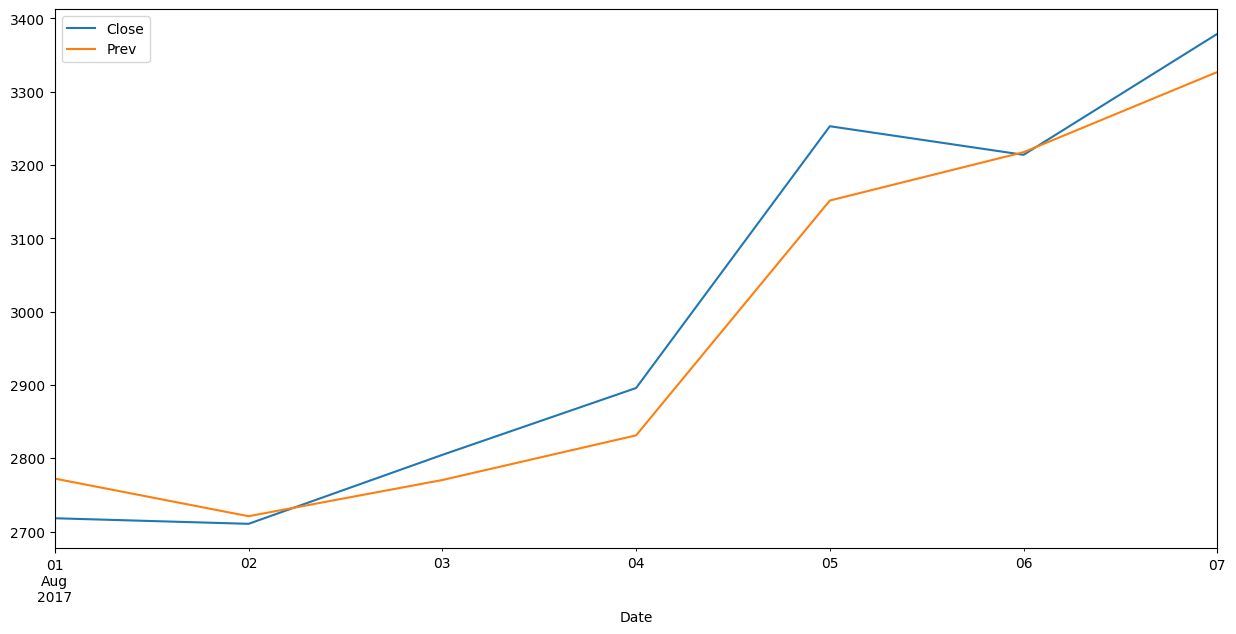

In [65]:
df_test[['Close', 'Prev']].plot(figsize=(15, 7))

<AxesSubplot:xlabel='Date'>

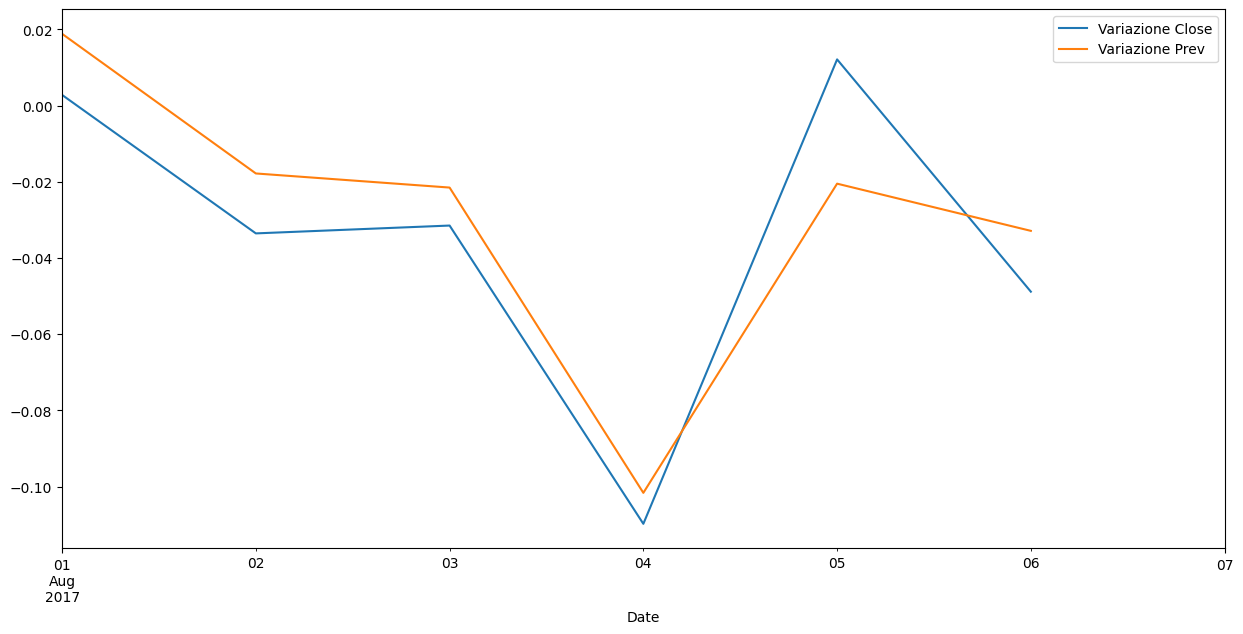

In [66]:
# calcoliamo la variazione percentuale della colonna Close e Prev
df_test['Variazione Close'] = df_test['Close'].pct_change()
df_test['Variazione Prev'] = df_test['Prev'].pct_change()

# confrontiamo in grafico le variazioni percentuali
df_test[['Variazione Close', 'Variazione Prev']].plot(figsize=(15, 7))
